# Overview Exercises:

### Be as specific as you can and answer for each of the following questions:

#### Formulate:
    - null hypothesis
    - alternative hypothesis

#### Give examples of:
    - true positive
    - true negative
    - type I error 
    - type II error

### 1. Has the network latency gone up since we switched internet service providers?

H0: Network latency has not changed since switching service providers.

HA: The new ISP has more network latency. 

True positive: Network latency is the same with both ISPs.

True negative: Network latency has increased since switching ISPs.

Type I error: We conclude network latency has increased when it actually has not.

Type II error: We believe network latency has remained the same when it has actually gone up.

### 2. Is the website redesign any good?

H0: The website design results in the same number of click-throughs as as before.

HA: The website design causes more click-throughs than prior.

True positive: We believe the number of click-throughs is the same and it actually is.

True negative: We believe there are more click-thoughs are there actually are.

Type I error: We believe there are more click-throughs but there are not.

Type II error: We believe the number of click-throughs is the same but it is actually more.

### 3. Is our television ad driving more sales?

H0: Our television ads have not affected our sales.

HA: Our television ads have affected our sales.

True positive: Our sales are the same and our sales have not changed.

True negative: Our sales increased with the ads and our sales actually increased.

Type I error: Our sales have increased but they have actually stayed the same.

Type II error: Our sales are the same but they have actually increased.

# T-Test Exercises:

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Do 1 and 3, number 2 is a bonus.

## 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - Answer: Mann-Whitney's test
- Are adults who drink milk taller than adults who dont drink milk?
    - Answer: One sample Wilcoxon signed rank test
- Is the the price of gas higher in texas or in new mexico?
    - Answer: Mann-Whitney's test
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - Answer: Kruskal-Wallis test

## 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

## 3. Load the mpg dataset (from pydataset) and use it to answer the following questions:

### Loaded info:

In [2]:
mpg = data('mpg')

In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [4]:
mpg['ave_fuel_use'] = (mpg.hwy + mpg.cty) / 2

Text(0, 0.5, 'Counts')

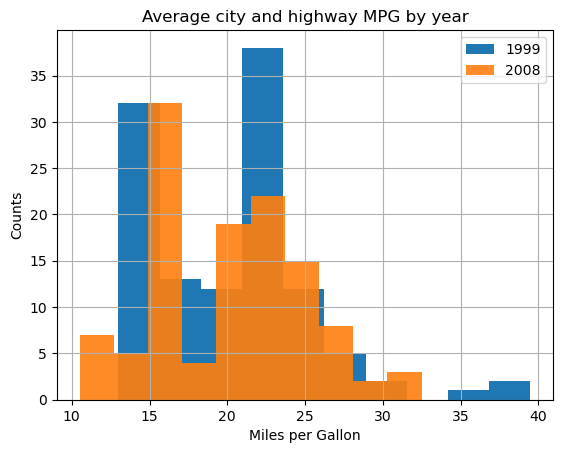

In [5]:
avg_mpg99 = mpg[mpg.year == 1999].ave_fuel_use
avg_mpg08 = mpg[mpg.year == 2008].ave_fuel_use

mpg[mpg.year == 1999].ave_fuel_use.hist(label='1999')
mpg[mpg.year == 2008].ave_fuel_use.hist(label='2008', alpha = 0.9)
plt.legend()
plt.title(f'Average city and highway MPG by year')
plt.xlabel(f'Miles per Gallon')
plt.ylabel(f'Counts')

Text(0, 0.5, 'Counts')

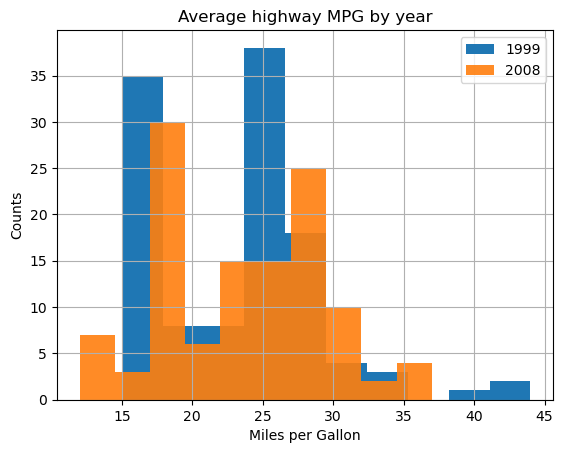

In [6]:
hwy_mpg99 = mpg[mpg.year == 1999].hwy
hwy_mpg08 = mpg[mpg.year == 2008].hwy

mpg[mpg.year == 1999].hwy.hist(label='1999')
mpg[mpg.year == 2008].hwy.hist(label='2008', alpha = 0.9)
plt.legend()
plt.title(f'Average highway MPG by year')
plt.xlabel(f'Miles per Gallon')
plt.ylabel(f'Counts')

Text(0, 0.5, 'Counts')

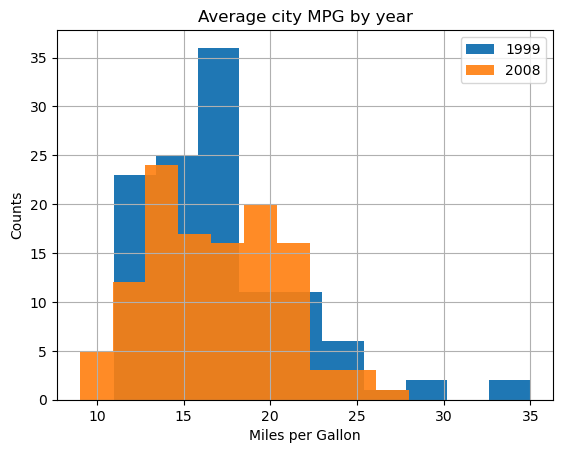

In [7]:
cty_mpg99 = mpg[mpg.year == 1999].cty
cty_mpg08 = mpg[mpg.year == 2008].cty

mpg[mpg.year == 1999].cty.hist(label='1999')
mpg[mpg.year == 2008].cty.hist(label='2008', alpha = 0.9)
plt.legend()
plt.title(f'Average city MPG by year')
plt.xlabel(f'Miles per Gallon')
plt.ylabel(f'Counts')

In [8]:
print(f' Variance for Average mpg in 1999: {avg_mpg99.var():.3f}')
print(f' Variance for Average mpg in 2008: {avg_mpg08.var():.3f}')
print("-----------------------------------------")
print(f' Variance for city mpg in 1999: {cty_mpg99.var():.3f}')
print(f' Variance for city mpg in 2008: {cty_mpg08.var():.3f}')
print("-----------------------------------------")
print(f' Variance for highway mpg in 1999: {hwy_mpg99.var():.3f}')
print(f' Variance for highway mpg in 2008: {hwy_mpg08.var():.3f}')

 Variance for Average mpg in 1999: 27.123
 Variance for Average mpg in 2008: 24.097
-----------------------------------------
 Variance for city mpg in 1999: 19.879
 Variance for city mpg in 2008: 16.453
-----------------------------------------
 Variance for highway mpg in 1999: 37.023
 Variance for highway mpg in 2008: 34.198


In [9]:
print(f' Mean for Average mpg in 1999: {avg_mpg99.mean():.3f}')
print(f' Mean for Average mpg in 2008: {avg_mpg08.mean():.3f}')
print("-----------------------------------------")
print(f' Mean for city mpg in 1999: {cty_mpg99.mean():.3f}')
print(f' Mean for city mpg in 2008: {cty_mpg08.mean():.3f}')
print("-----------------------------------------")
print(f' Mean for highway mpg in 1999: {hwy_mpg99.mean():.3f}')
print(f' Mean for highway mpg in 2008: {hwy_mpg08.mean():.3f}')

 Mean for Average mpg in 1999: 20.222
 Mean for Average mpg in 2008: 20.077
-----------------------------------------
 Mean for city mpg in 1999: 17.017
 Mean for city mpg in 2008: 16.701
-----------------------------------------
 Mean for highway mpg in 1999: 23.427
 Mean for highway mpg in 2008: 23.453


In [10]:
print(len(avg_mpg99))
print(len(avg_mpg08))
print(len(cty_mpg99))
print(len(cty_mpg08))
print(len(hwy_mpg99))
print(len(hwy_mpg08))

117
117
117
117
117
117


Hypothesis:
- H0: Average MPG in 2008 is <= average MPG in 1999.
- HA: Average MPG in 2008 is > average MPG in 1999.

Verify assumptions:

- Check that we have at least 30 observations.
    - 117:
- Independence
    - Seems like it.
- Equal variance: 'equal_var' argument is True if equal and False if not equal.
    - I don't know, results for both below.
    
Set alpha:

In [11]:
alpha = 0.05

In [12]:
t_ave, p_ave = stats.ttest_ind(avg_mpg99, avg_mpg08)
t_ave, p_ave
#equal_var=False output: (0.21960177245940962, 0.8263750772060638)
#equal_var=True output: (0.21960177245940962, 0.8263744040323578)

(0.21960177245940962, 0.8263744040323578)

In [13]:
if p_ave/2 > alpha:
    print("We fail to reject null hypothesis")
elif t_ave < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject null hypothesis


In [14]:
t_cty, p_cty = stats.ttest_ind(cty_mpg99, cty_mpg08)
t_cty, p_cty
#equal_var=False output: (0.5674988409997608, 0.5709289258613233)
#equal_var=True output: (0.5674988409997608, 0.5709240495406107)

(0.5674988409997608, 0.5709240495406107)

In [15]:
if p_cty/2 > alpha:
    print("We fail to reject null hypothesis")
elif t_cty < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject null hypothesis


In [16]:
t_hwy, p_hwy = stats.ttest_ind(hwy_mpg99, hwy_mpg08)
t_hwy, p_hwy
#equal_var=False output: (-0.03286431672888292, 0.973811089269393)
#equal_var=True output: (-0.03286431672888292, 0.9738110448529322)

(-0.03286431672888292, 0.9738110448529322)

In [17]:
if p_hwy/2 > alpha:
    print("We fail to reject null hypothesis")
elif t_hwy < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject null hypothesis


#### Conclusion: We fail to reject the null hypothesis.
- H0: Average MPG in 2008 is <= average MPG in 1999.


### - Are compact cars more fuel-efficient than the average car?

In [18]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  ave_fuel_use  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [19]:
compact = mpg[mpg['class'] == 'compact'].ave_fuel_use
print('Info for compact cars:')
print(f'Number of values: {len(compact):>13}')
print(f'Ave MPG: {compact.mean():>26.3f}')
print(f'MPG variance: {compact.var():>21.3f}')
print('------------------------------')
print(f'Info for all cars:')
print(f'Number of values: {len(mpg.ave_fuel_use):>14}')
print(f'Ave MPG of all cars: {mpg.ave_fuel_use.mean():>14.3f}')
print(f'MPG variance for all cars: {mpg.ave_fuel_use.var():>8.3f}')

Info for compact cars:
Number of values:            47
Ave MPG:                     24.213
MPG variance:                12.443
------------------------------
Info for all cars:
Number of values:            234
Ave MPG of all cars:         20.150
MPG variance for all cars:   25.505


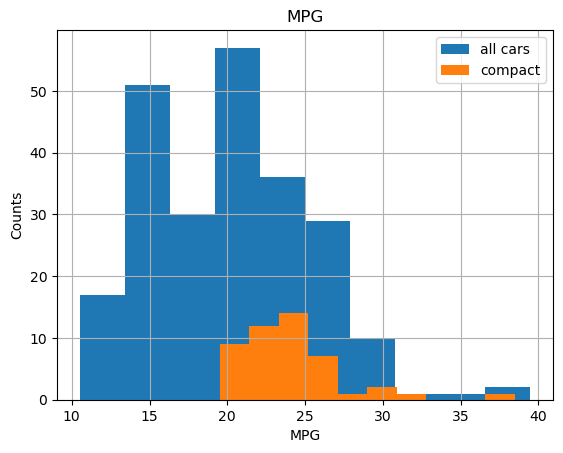

In [25]:
mpg.ave_fuel_use.hist(label = 'all cars')
compact.hist(label = "compact")

plt.title(f'MPG')
plt.xlabel(f'MPG')
plt.ylabel(f'Counts')
plt.legend()

Assumptions:

- Min 30 observations: (see counts above)
- Distribution "kinda" normal: 

Hypothesis:

- H0: Compact cars have the same fuel efficency as the average car.
- HA: Compact cars have better fuel effiency than the average car.

In [21]:
alpha = 0.05

### - Do manual cars get better gas mileage than automatic cars?

In [22]:
manual = mpg[mpg.trans.str.startswith('m')].ave_fuel_use

print(f' Manual cars get an average mpg of: {manual.mean():>10.3f}')
print(f' All cars get an average mpg of: {mpg.ave_fuel_use.mean():>13.3f}')
print('------------------------------------------')
print(f' Manual cars mpg have a variance of: {manual.var():>9.3f}')
print(f' All cars mpg have a variance of: {mpg.ave_fuel_use.var():>12.3f}')


 Manual cars get an average mpg of:     22.227
 All cars get an average mpg of:        20.150
------------------------------------------
 Manual cars mpg have a variance of:    26.635
 All cars mpg have a variance of:       25.505


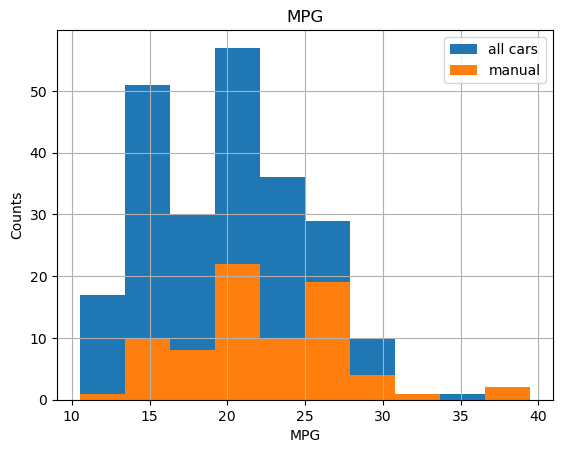

In [24]:
mpg.ave_fuel_use.hist(label = 'all cars')
manual.hist(label = "manual")

plt.title(f'MPG')
plt.xlabel(f'MPG')
plt.ylabel(f'Counts')
plt.legend()

Assumptions:

- Min 30 observations: (see counts above)
- Distribution "kinda" normal: 

Hypothesis:

- H0: Manual cars have the same fuel efficency as the average car.
- HA: Manual cars have better fuel effiency than the average car.